<a href="https://colab.research.google.com/github/bigirimanainnocent12/RandomForestRegressor/blob/main/ASSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***√Ä propos de l'ensemble de donn√©es***

**Pr√©sentation de l'ensemble de donn√©es :**

L'ensemble de donn√©es sur l'assurance maladie contient des informations sur plusieurs facteurs pouvant influencer les d√©penses m√©dicales, notamment l'√¢ge, le sexe, l'IMC, le tabagisme, le nombre d'enfants et la r√©gion. Cet ensemble de donn√©es peut servir √† former un mod√®le d'apprentissage automatique capable de pr√©dire les d√©penses m√©dicales des nouveaux clients.

Fournir un aper√ßu des facteurs cl√©s qui contribuent √† l‚Äôaugmentation des co√ªts d‚Äôassurance et aider l‚Äôentreprise √† prendre des d√©cisions plus √©clair√©es en mati√®re de tarification et d‚Äô√©valuation des risques.

L'ensemble de donn√©es contient 27 000 lignes et 7 colonnes.
Les colonnes incluent:

- √Çge (Quantitative)
- Sexe (qualitative binaire)
- IMC (Indice de masse corporelle)
- Enfants (quantitative)
- Fumeur qualitative binaire
- R√©gion (qualitative)
-Frais (quantitative)

# ***Objectif***


Constuire un modele d'apprentissage automatique pour am√©liorer l‚Äôefficacit√© et la rentabilit√© des compagnies d‚Äôassurance maladie ?

# **Importations de biblioth√®ques**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# **Importations de la base de donn√©es**

In [3]:
import kagglehub


chemin = kagglehub.dataset_download("harishkumardatalab/medical-insurance-price-prediction")

print("Path to dataset files:", chemin)


for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break


df = pd.read_csv(csv_file_path)
df

Path to dataset files: /kaggle/input/medical-insurance-price-prediction


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]

# **V√©rification des valeurs manquantes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **V√©rification des valeurs aberrantes**

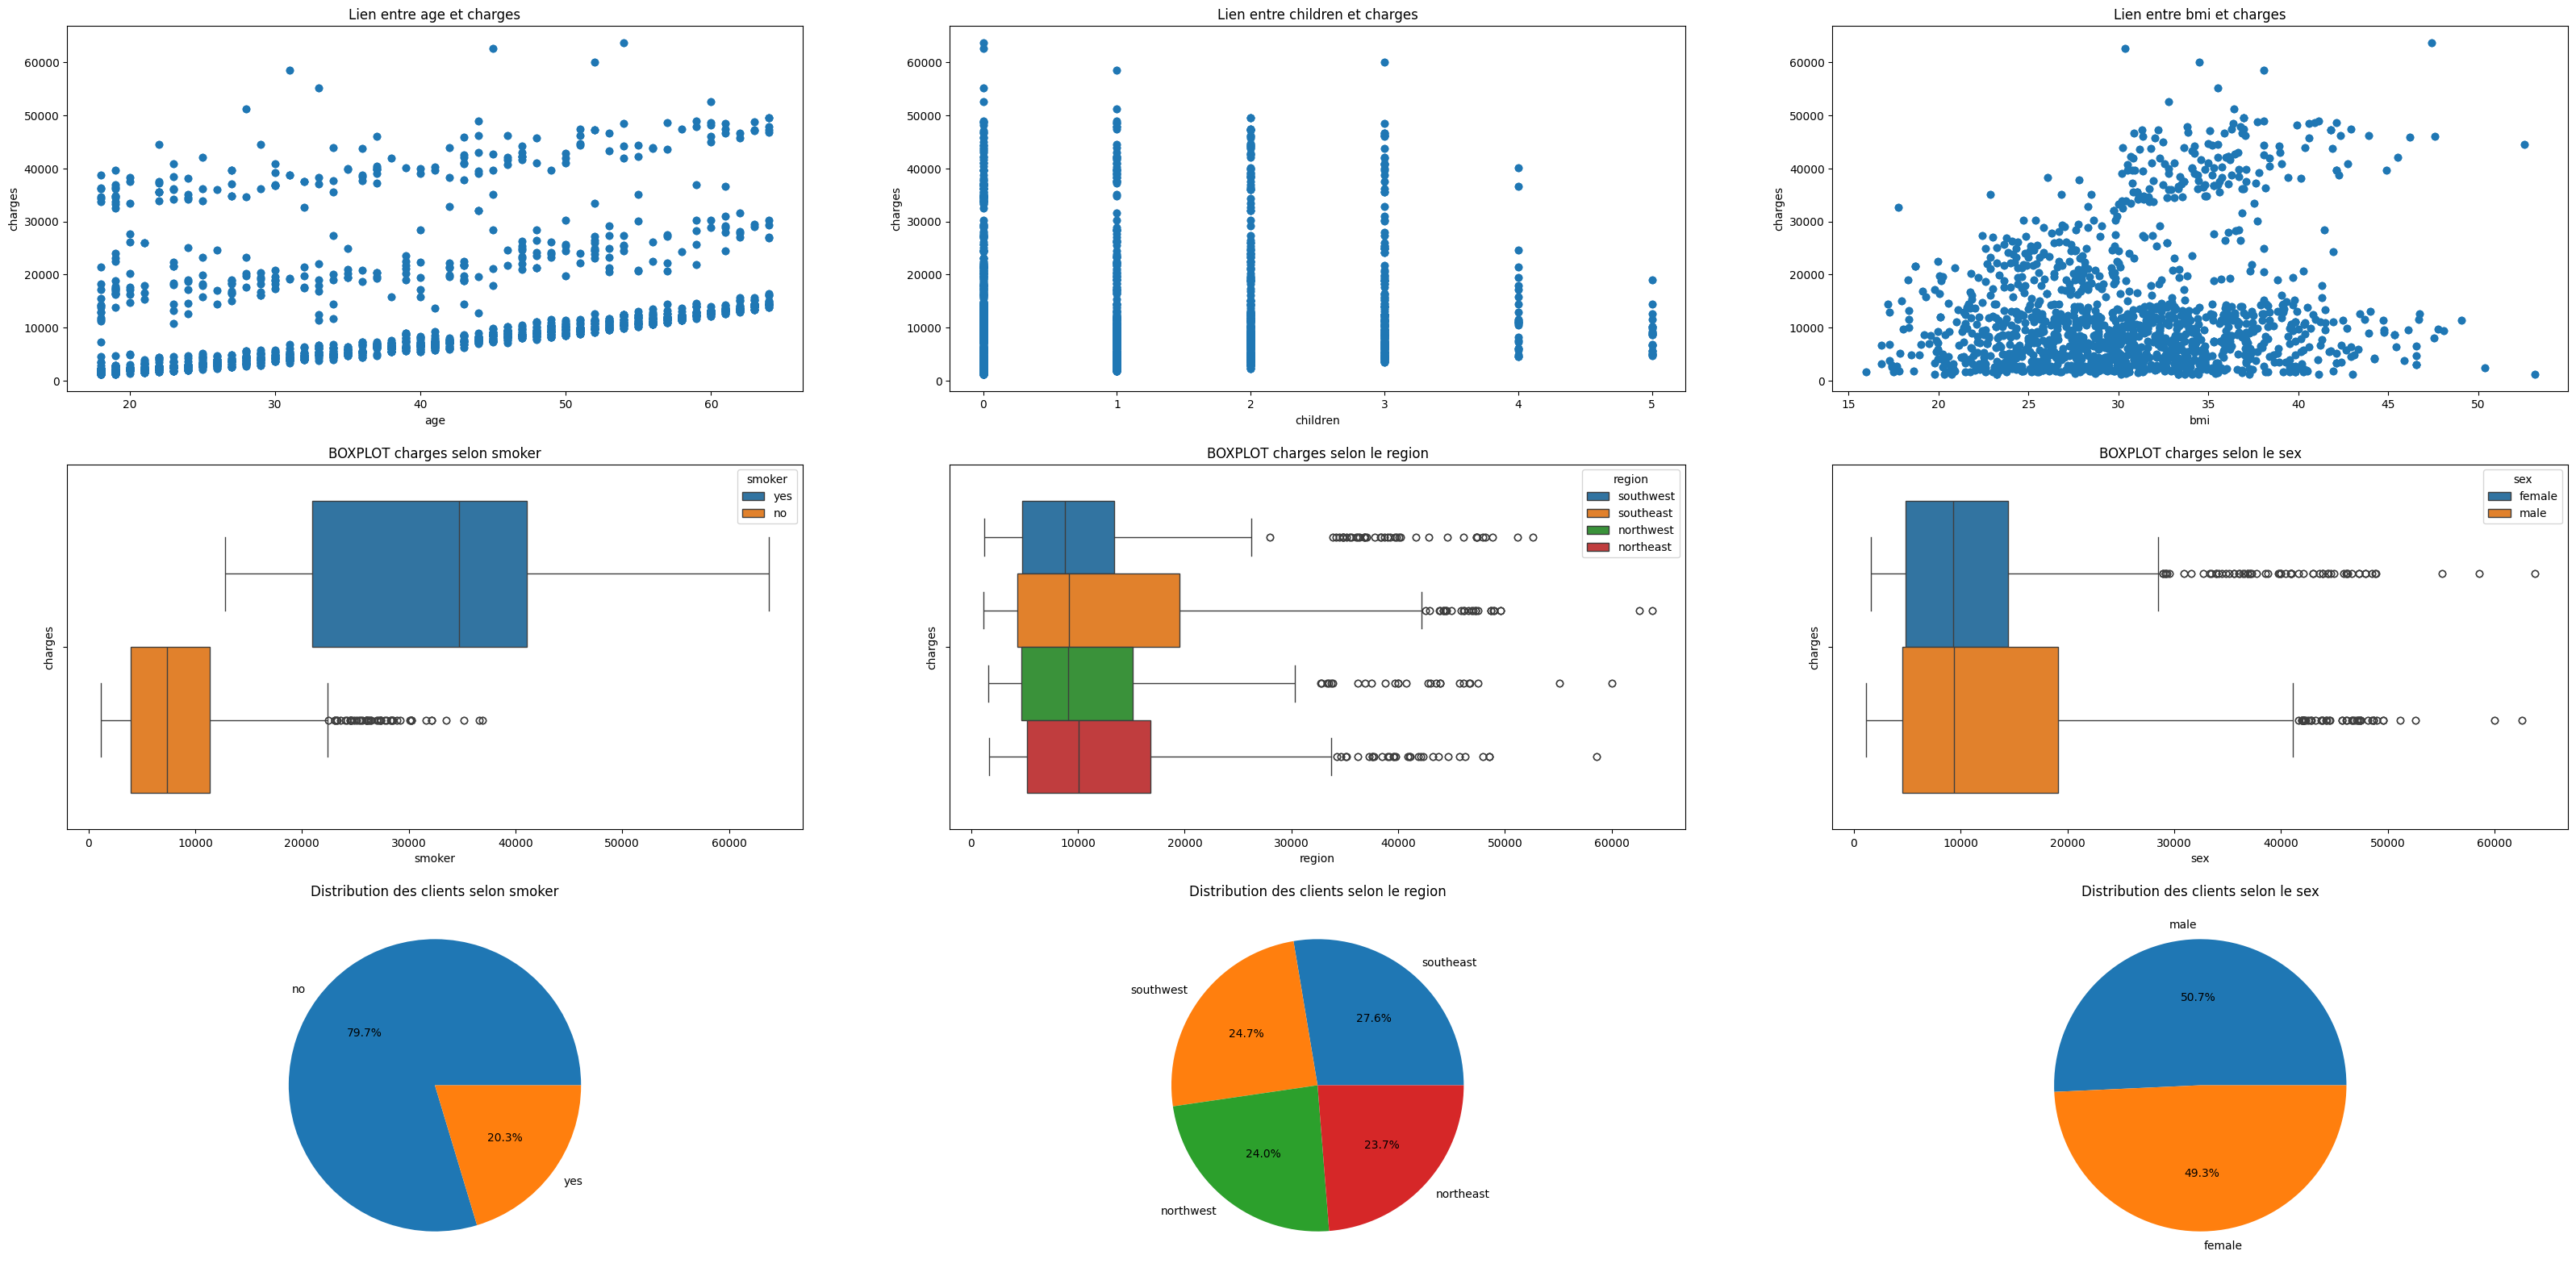

In [6]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(40,20))
axes[0][0].plot(df['age'],df['charges'],'o')
axes[0][0].set_ylabel('charges')
axes[0][0].set_xlabel('age')
axes[0][0].set_title('Lien entre age et charges')

axes[0][1].plot(df['children'],df['charges'],'o')
axes[0][1].set_ylabel('charges')
axes[0][1].set_xlabel('children')
axes[0][1].set_title('Lien entre children et charges')

axes[0][2].plot(df['bmi'],df['charges'],'o')
axes[0][2].set_ylabel('charges')
axes[0][2].set_xlabel('bmi')
axes[0][2].set_title('Lien entre bmi et charges')

sns.boxplot(x="charges",data=df,hue="smoker",ax=axes[1][0])
axes[1][0].set_ylabel('charges')
axes[1][0].set_xlabel('smoker')
axes[1][0].set_title('BOXPLOT charges selon smoker')

sns.boxplot(x="charges",data=df,hue="region",ax=axes[1][1])
axes[1][1].set_ylabel('charges')
axes[1][1].set_xlabel('region')
axes[1][1].set_title('BOXPLOT charges selon le region')

sns.boxplot(x="charges",data=df,hue="sex",ax=axes[1][2])
axes[1][2].set_ylabel('charges')
axes[1][2].set_xlabel('sex')
axes[1][2].set_title('BOXPLOT charges selon le sex')


axes[2][0].pie(x=df['smoker'].value_counts(),labels=df['smoker'].value_counts().index,autopct='%1.1f%%')

axes[2][0].set_title('Distribution des clients selon smoker')


axes[2][1].pie(x=df['region'].value_counts(),labels=df['region'].value_counts().index,autopct='%1.1f%%')

axes[2][1].set_title('Distribution des clients selon le region')



axes[2][2].pie(x=df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%')

axes[2][2].set_title('Distribution des clients selon le sex')

plt.show()

# ***Statistiques descriptives***

In [7]:
statistiques = df.groupby(['sex', 'smoker'])['charges'].describe()

statistiques

count          mean           std         min           25%  \
sex    smoker                                                                 
female no      1134.0   8756.307017   6041.623960   1607.5101   4200.566575   
       yes      232.0  30721.380703  11838.728246  13844.5060  19747.243325   
male   no      1074.0   8060.534956   5969.941470   1121.8739   3591.480000   
       yes      332.0  33272.561758  11192.832907  12829.4551  21259.377950   

                       50%           75%          max  
sex    smoker                                          
female no       7640.30920  11832.988525  36910.60803  
       yes     29045.91475  40911.257000  63770.42801  
male   no       6940.90985  10796.350250  32108.66282  
       yes     36193.40035  41949.244100  62592.87309

In [8]:
df.groupby('region')['charges'].describe()

count          mean           std        min          25%  \
region                                                                 
northeast  658.0  13475.874737  11310.618603  1694.7964  5209.578850   
northwest  664.0  12463.129315  10996.174365  1621.3402  4733.635288   
southeast  766.0  14748.777706  14138.464968  1121.8739  4349.725100   
southwest  684.0  12164.196435  11419.830441  1241.5650  4746.344000   

                   50%           75%          max  
region                                             
northeast  10072.05505  16776.304050  58571.07448  
northwest   9081.14720  15153.617225  60021.39897  
southeast   9140.95100  19534.924300  63770.42801  
southwest   8790.53100  13390.559000  52590.82939

In [9]:
df['age'].describe()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
df['bmi'].describe()

count    2772.000000
mean       30.701349
std         6.129449
min        15.960000
25%        26.220000
50%        30.447500
75%        34.770000
max        53.130000
Name: bmi, dtype: float64

In [11]:
df['children'].describe()

count    2772.000000
mean        1.101732
std         1.214806
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [12]:
df['charges'].describe()

count     2772.000000
mean     13261.369959
std      12151.768945
min       1121.873900
25%       4687.797000
50%       9333.014350
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64

# **üßπ Pr√©traitement**

In [13]:
map={'yes':1,'no':0}
df['smoker']=df['smoker'].map(map).astype(bool)
map_2={'male':1,'female':0}
df['sex']=df['sex'].map(map_2).astype(bool)
map_3={'southwest':'Nord','southeast':'Sud','northwest':'Est','northeast':'Ouest'}
df['region']=df['region'].map(map_3)

# **Mod√®le**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



Y = df['charges']
X = df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Pr√©traitement : standardisation des variables num√©riques
preprocessor = ColumnTransformer(transformers=[
    ('Variables quantitatives', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
    ('Variable qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    ('Variables binaires', 'passthrough', X.select_dtypes(include=['bool']).columns)


])

# Pipeline avec RandomForestRegressor
model = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        random_state=42,
        # Param√®tres par d√©faut plus conservateurs
        n_jobs=-1,  # Utilise tous les processeurs disponibles
        oob_score=True  # Active le score Out-of-Bag pour √©valuation
    )
)

# Grille des hyperparam√®tres optimis√©e pour √©viter le surapprentissage
param_grid = {
    'randomforestregressor__n_estimators': [80, 90, 100,200],
    'randomforestregressor__max_depth': [5, 10, 15, None,20,25,30],
    'randomforestregressor__min_samples_split': [2, 5, 10,15,20],
    'randomforestregressor__min_samples_leaf': [8, 10, 20,25],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__oob_score': [True, False]
}

# Recherche par grille avec validation crois√©e plus robuste
grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,
    verbose=3
)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Variables '
                                                                         'quantitatives',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('Variable '
                                                                         'qualitative',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['region'], dtype='object')),
                                                                        ('Variables '
                                                                         'binaires',
                                                                         'passthrough',
                                                                         Index...
                                                              20, 25, 30],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [8, 10, 20,
                                                                     25],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15, 20],
                         'randomforestregressor__n_estimators': [80, 90, 100,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

# ***Meilleurs hyperparam√®tres***

In [38]:

print("Meilleurs param√®tres :", grid_model.best_params_)

Meilleurs param√®tres : {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 8, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200, 'randomforestregressor__oob_score': True}


In [39]:
best_model =grid_model.best_estimator_
y_pred = best_model.predict(X_test)

# ***√âvaluation***

In [40]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE : {rmse}")
print(f"R¬≤ : {r2}")
print(f"MAPE : {mape}")

RMSE : 19403113.752773788
R¬≤ : 0.875993549928046
MAPE : 0.2516969352977219


# **Analyse des R√©sidus**

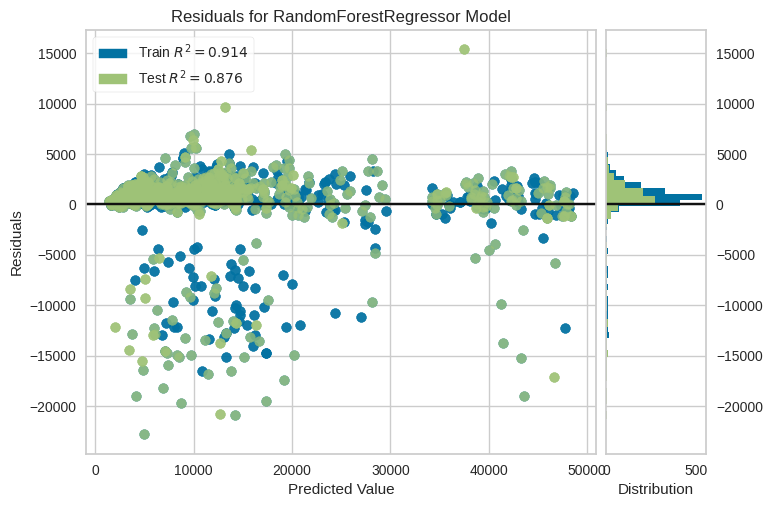

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
from yellowbrick.regressor import ResidualsPlot, prediction_error
resisdu=ResidualsPlot(best_model)
resisdu.fit(X_train,y_train)
resisdu.score(X_test,y_test)
resisdu.show()

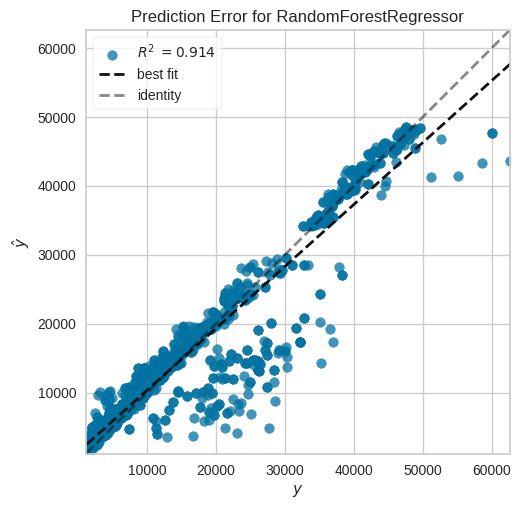

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
from yellowbrick.regressor import prediction_error
error = prediction_error(best_model, X_train, y_train)

error.score(X_test, y_test)
error.show()

# **Courbes d'apprentissage**

In [43]:
import matplotlib.pyplot as plt
import numpy as np


results = grid_model.cv_results_


train_scores = -results['mean_train_score']
val_scores = -results['mean_test_score']


param_combinations = range(len(train_scores))

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_scores, label='Negative MSE (train)', marker='o')
plt.plot(param_combinations, val_scores, label='Negative MSE (validation)', marker='s')
plt.xlabel("Index de la combinaison d'hyperparam√®tres")
plt.ylabel("Negative Mean Squared Error")
plt.title("Courbes d'apprentissage - GridSearchCV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Indices de Sobol**

In [50]:
import pandas as pd
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Configuration d'OpenTURNS
ot.RandomGenerator.SetSeed(1976)

class SobolAnalysisForRandomForest:
    """
    Classe pour l'analyse de sensibilit√© de Sobol appliqu√©e √† un mod√®le entra√Æn√©
    G√®re les variables num√©riques, binaires et cat√©gorielles multi-modalit√©s
    """

    def __init__(self, X, fitted_model):
        """
        Initialise l'analyse avec les donn√©es d'entr√©e et le mod√®le d√©j√† entra√Æn√©

        Parameters:
        -----------
        X : DataFrame
            Variables explicatives (utilis√©es pour d√©finir les distributions)
        fitted_model : sklearn model
            Mod√®le d√©j√† entra√Æn√© (ex: votre GridSearchCV fitted)
        """
        self.X = X.copy()
        self.fitted_model = fitted_model
        self.input_distributions = None
        self.ot_function = None
        self.label_encoders = {}
        self.variable_info = {}  # Stocke les infos sur chaque variable

    def _analyze_variable_types(self):
        """
        Analyse les types de variables dans le dataset
        """
        self.variable_info = {}

        for col in self.X.columns:
            if self.X[col].dtype in ['int64', 'float64']:
                # Variable num√©rique
                unique_vals = self.X[col].nunique()
                if unique_vals == 2 and set(self.X[col].unique()).issubset({0, 1}):
                    self.variable_info[col] = {
                        'type': 'binary_numeric',
                        'unique_values': sorted(self.X[col].unique())
                    }
                else:
                    self.variable_info[col] = {
                        'type': 'numeric',
                        'mean': self.X[col].mean(),
                        'std': self.X[col].std()
                    }

            elif self.X[col].dtype == 'bool':
                # Variable bool√©enne
                self.variable_info[col] = {
                    'type': 'binary_bool',
                    'proportion': self.X[col].mean()
                }

            elif self.X[col].dtype == 'object' or self.X[col].dtype.name == 'category':
                # Variable cat√©gorielle
                unique_vals = self.X[col].nunique()
                if unique_vals == 2:
                    self.variable_info[col] = {
                        'type': 'binary_categorical',
                        'unique_values': list(self.X[col].unique()),
                        'proportions': self.X[col].value_counts(normalize=True).to_dict()
                    }
                else:
                    self.variable_info[col] = {
                        'type': 'categorical',
                        'unique_values': list(self.X[col].unique()),
                        'proportions': self.X[col].value_counts(normalize=True).to_dict()
                    }

        print("Types de variables d√©tect√©s:")
        for col, info in self.variable_info.items():
            print(f"  {col}: {info['type']}")

    def _prepare_data_for_openturns(self):
        """
        Pr√©pare les donn√©es pour OpenTURNS en encodant les variables cat√©gorielles
        """
        self.X_encoded = self.X.copy()

        for col in self.X.columns:
            var_type = self.variable_info[col]['type']

            if var_type in ['categorical', 'binary_categorical']:
                # Encoder les variables cat√©gorielles
                le = LabelEncoder()
                self.X_encoded[col] = le.fit_transform(self.X[col])
                self.label_encoders[col] = le

                # Mettre √† jour les informations avec les valeurs encod√©es
                self.variable_info[col]['encoded_values'] = list(range(len(le.classes_)))
                self.variable_info[col]['class_mapping'] = dict(zip(
                    range(len(le.classes_)), le.classes_
                ))

    def create_input_distributions(self):
        """
        Cr√©e les distributions d'entr√©e pour OpenTURNS bas√©es sur les donn√©es
        """
        self._analyze_variable_types()
        self._prepare_data_for_openturns()

        self.input_distributions = []
        self.variable_names = []

        for col in self.X.columns:
            var_type = self.variable_info[col]['type']

            if var_type == 'numeric':
                # Variable num√©rique continue
                mean_val = self.variable_info[col]['mean']
                std_val = self.variable_info[col]['std']

                # √âviter les √©carts-types nuls
                if std_val == 0:
                    std_val = 1e-6

                dist = ot.Normal(mean_val, std_val)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type == 'binary_numeric':
                # Variable binaire num√©rique (0/1)
                p = (self.X_encoded[col] == 1).mean()
                dist = ot.Bernoulli(p)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type == 'binary_bool':
                # Variable bool√©enne
                p = self.variable_info[col]['proportion']
                dist = ot.Bernoulli(p)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type in ['binary_categorical', 'categorical']:
                # Variables cat√©gorielles (binaires ou multi-modalit√©s)
                encoded_values = self.variable_info[col]['encoded_values']
                proportions = []

                for encoded_val in encoded_values:
                    original_val = self.variable_info[col]['class_mapping'][encoded_val]
                    prop = self.variable_info[col]['proportions'][original_val]
                    proportions.append(prop)

                # Utiliser une distribution multinomiale discr√®te
                dist = ot.UserDefined([[val] for val in encoded_values], proportions)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

        # Cr√©er la distribution compos√©e
        self.composed_distribution = ot.ComposedDistribution(self.input_distributions)
        self.composed_distribution.setDescription(self.variable_names)

        print(f"\nDistributions cr√©√©es pour {len(self.variable_names)} variables")

    def create_openturns_function(self):
        """
        Cr√©e une fonction OpenTURNS √† partir du mod√®le entra√Æn√©
        """
        def model_function(X):
            # Convertir l'entr√©e OpenTURNS en DataFrame pandas
            X_df = pd.DataFrame([X], columns=self.variable_names)

            # D√©coder les variables cat√©gorielles si n√©cessaire
            for col in self.variable_names:
                var_type = self.variable_info[col]['type']

                if var_type in ['categorical', 'binary_categorical']:
                    # Convertir en entier puis d√©coder
                    encoded_val = int(round(X_df[col].iloc[0]))
                    # S'assurer que la valeur est dans les limites
                    max_encoded = max(self.variable_info[col]['encoded_values'])
                    encoded_val = max(0, min(encoded_val, max_encoded))

                    # D√©coder la valeur
                    original_val = self.variable_info[col]['class_mapping'][encoded_val]
                    X_df[col] = original_val

                elif var_type == 'binary_bool':
                    # Convertir en bool√©en
                    X_df[col] = bool(round(X_df[col].iloc[0]))

                elif var_type == 'binary_numeric':
                    # S'assurer que c'est 0 ou 1
                    X_df[col] = int(round(X_df[col].iloc[0]))

            # Appliquer le mod√®le
            try:
                prediction = self.fitted_model.predict(X_df)
                return [float(prediction[0])]
            except Exception as e:
                print(f"Erreur lors de la pr√©diction: {e}")
                print(f"Donn√©es d'entr√©e: {X_df}")
                return [0.0]  # Valeur par d√©faut

        # Cr√©er la fonction OpenTURNS
        dim_input = len(self.variable_names)
        dim_output = 1

        self.ot_function = ot.PythonFunction(dim_input, dim_output, model_function)
        self.ot_function.setInputDescription(self.variable_names)
        self.ot_function.setOutputDescription(["Prediction"])

    def compute_sobol_indices(self, size=1000, computeSecondOrder=False):
        """
        Calcule les indices de Sobol

        Parameters:
        -----------
        size : int
            Taille de l'√©chantillon pour l'analyse de Sobol
        computeSecondOrder : bool
            Si True, calcule les indices de second ordre
        """
        # Cr√©er l'exp√©rience de Sobol
        sie = ot.SobolIndicesExperiment(self.composed_distribution, size, computeSecondOrder)
        inputDesign = sie.generate()

        # √âvaluer le mod√®le
        print(f"√âvaluation du mod√®le sur {inputDesign.getSize()} points...")
        outputDesign = self.ot_function(inputDesign)

        # Calculer les indices de Sobol
        self.sensitivity_analysis = ot.SaltelliSensitivityAlgorithm(
            inputDesign, outputDesign, size
        )
        self.sensitivity_analysis.setUseAsymptoticDistribution(True)

        # R√©cup√©rer les indices
        self.first_order_indices = self.sensitivity_analysis.getFirstOrderIndices()
        self.total_order_indices = self.sensitivity_analysis.getTotalOrderIndices()

        print("Indices de Sobol calcul√©s avec succ√®s!")

    def display_results(self):
        """
        Affiche les r√©sultats de l'analyse de sensibilit√© avec informations sur les variables
        """
        print("\n=== R√âSULTATS DE L'ANALYSE DE SENSIBILIT√â ===")

        print("\nInformations sur les variables:")
        for i, name in enumerate(self.variable_names):
            var_type = self.variable_info[name]['type']
            print(f"{name} ({var_type}):")

            if var_type == 'categorical':
                unique_vals = self.variable_info[name]['unique_values']
                print(f"  Modalit√©s: {unique_vals}")
            elif var_type == 'binary_categorical':
                unique_vals = self.variable_info[name]['unique_values']
                print(f"  Modalit√©s: {unique_vals}")

        print("\nIndices de premier ordre (effet principal):")
        for i, name in enumerate(self.variable_names):
            print(f"{name}: {self.first_order_indices[i]:.4f}")

        print("\nIndices totaux (effet principal + interactions):")
        for i, name in enumerate(self.variable_names):
            print(f"{name}: {self.total_order_indices[i]:.4f}")

        # Tri par importance (indices totaux)
        importance_ranking = sorted(
            zip(self.variable_names, self.total_order_indices),
            key=lambda x: x[1], reverse=True
        )

        print("\nClassement par importance (indices totaux):")
        for i, (name, importance) in enumerate(importance_ranking, 1):
            var_type = self.variable_info[name]['type']
            print(f"{i}. {name} ({var_type}): {importance:.4f}")

        print("\nInterpr√©tation:")
        print("- Les indices de premier ordre mesurent l'effet principal de chaque variable")
        print("- Les indices totaux incluent les interactions avec les autres variables")
        print("- Plus l'indice est √©lev√©, plus la variable est importante")
        print("- Variables cat√©gorielles g√©r√©es via encodage num√©rique")

    def plot_sobol_indices_matplotlib(self):
        """
        Trace les indices de Sobol avec matplotlib - version am√©lior√©e
        """
        # Trier les variables par importance (indices totaux)
        sorted_indices = sorted(
            zip(self.variable_names, self.first_order_indices, self.total_order_indices),
            key=lambda x: x[2], reverse=True
        )

        sorted_names = [x[0] for x in sorted_indices]
        sorted_first = [x[1] for x in sorted_indices]
        sorted_total = [x[2] for x in sorted_indices]

        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        x = np.arange(len(sorted_names))
        width = 0.35

        bars1 = ax.bar(x - width/2, sorted_first, width,
                      label='Indice de premier ordre', alpha=0.8, color='skyblue')
        bars2 = ax.bar(x + width/2, sorted_total, width,
                      label='Indice total', alpha=0.8, color='lightcoral')

        ax.set_xlabel('Variables')
        ax.set_ylabel('Indices de Sobol')
        ax.set_title('Analyse de sensibilit√© - Indices de Sobol\n(Variables tri√©es par importance)')
        ax.set_xticks(x)

        # Cr√©er des labels avec le type de variable
        labels_with_type = []
        for name in sorted_names:
            var_type = self.variable_info[name]['type']
            type_abbrev = {
                'numeric': 'num',
                'binary_numeric': 'bin',
                'binary_bool': 'bool',
                'binary_categorical': 'cat2',
                'categorical': 'cat+'
            }.get(var_type, var_type)
            labels_with_type.append(f"{name}\n({type_abbrev})")

        ax.set_xticklabels(labels_with_type, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar in bars1:
            height = bar.get_height()
            if height > 0.001:  # N'afficher que si significatif
                ax.annotate(f'{height:.3f}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=8)

        for bar in bars2:
            height = bar.get_height()
            if height > 0.001:  # N'afficher que si significatif
                ax.annotate(f'{height:.3f}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

    def plot_sobol_indices(self):
        """
        Trace les indices de Sobol
        """
        try:
            # Utiliser la fonction OpenTURNS pour tracer
            graph = ot.SaltelliSensitivityAlgorithm.DrawSobolIndices(
                self.variable_names,
                self.first_order_indices,
                self.total_order_indices
            )

            # Afficher le graphique
            import openturns.viewer as viewer
            fig = viewer.View(graph)
            plt.title("Indices de Sobol - Analyse de sensibilit√©")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Erreur lors de la cr√©ation du graphique OpenTURNS: {e}")

        # Graphique avec matplotlib (toujours affich√©)
        self.plot_sobol_indices_matplotlib()

    def get_variable_importance_summary(self):
        """
        Retourne un r√©sum√© de l'importance des variables
        """
        summary = []
        for i, name in enumerate(self.variable_names):
            var_info = self.variable_info[name]
            summary.append({
                'variable': name,
                'type': var_info['type'],
                'first_order_index': self.first_order_indices[i],
                'total_order_index': self.total_order_indices[i],
                'interaction_effect': self.total_order_indices[i] - self.first_order_indices[i]
            })

        # Trier par importance totale
        summary.sort(key=lambda x: x['total_order_index'], reverse=True)
        return summary

    def run_complete_analysis(self, sobol_size=1000):
        """
        Ex√©cute l'analyse compl√®te avec le mod√®le d√©j√† entra√Æn√©

        Parameters:
        -----------
        sobol_size : int
            Taille de l'√©chantillon pour l'analyse de Sobol
        """
        print("=== ANALYSE DE SENSIBILIT√â AVEC INDICES DE SOBOL ===")
        print("Version am√©lior√©e - Support des variables cat√©gorielles")

        # 1. Cr√©ation des distributions d'entr√©e
        print("\n1. Analyse des types de variables et cr√©ation des distributions...")
        self.create_input_distributions()

        # 2. Cr√©ation de la fonction OpenTURNS
        print("\n2. Cr√©ation de la fonction OpenTURNS...")
        self.create_openturns_function()

        # 3. Calcul des indices de Sobol
        print("\n3. Calcul des indices de Sobol...")
        self.compute_sobol_indices(size=sobol_size)

        # 4. Affichage des r√©sultats
        print("\n4. Affichage des r√©sultats...")
        self.display_results()

        # 5. Trac√© des graphiques
        print("\n5. Trac√© des graphiques...")
        self.plot_sobol_indices()

        # 6. R√©sum√© de l'importance
        summary = self.get_variable_importance_summary()

        return self, summary

=== ANALYSE DE SENSIBILIT√â AVEC INDICES DE SOBOL ===
Version am√©lior√©e - Support des variables cat√©gorielles

1. Analyse des types de variables et cr√©ation des distributions...
Types de variables d√©tect√©s:
  age: numeric
  sex: binary_bool
  bmi: numeric
  children: numeric
  smoker: binary_bool
  region: categorical

Distributions cr√©√©es pour 6 variables

2. Cr√©ation de la fonction OpenTURNS...

3. Calcul des indices de Sobol...
√âvaluation du mod√®le sur 8000 points...
Indices de Sobol calcul√©s avec succ√®s!

4. Affichage des r√©sultats...

=== R√âSULTATS DE L'ANALYSE DE SENSIBILIT√â ===

Informations sur les variables:
age (numeric):
sex (binary_bool):
bmi (numeric):
children (numeric):
smoker (binary_bool):
region (categorical):
  Modalit√©s: ['Est', 'Ouest', 'Sud', 'Nord']

Indices de premier ordre (effet principal):
age: 0.0923
sex: -0.0021
bmi: 0.0456
children: 0.0030
smoker: 0.8736
region: -0.0032

Indices totaux (effet principal + interactions):
age: 0.1263
sex: 0.0

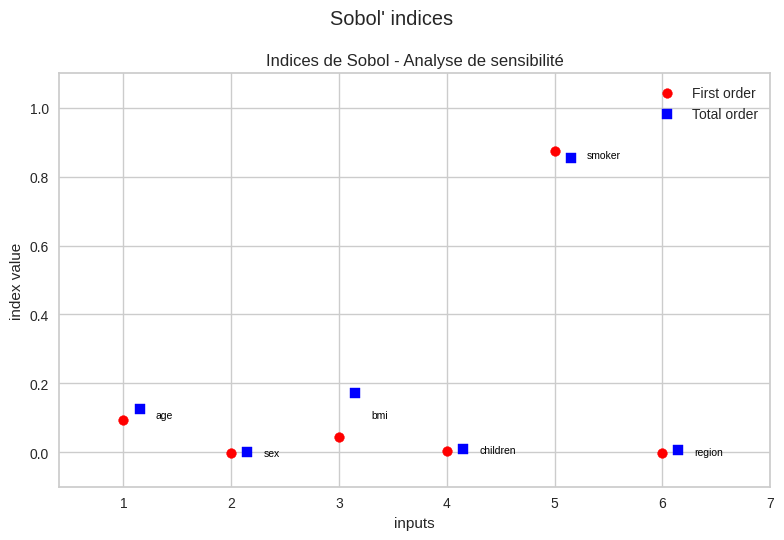

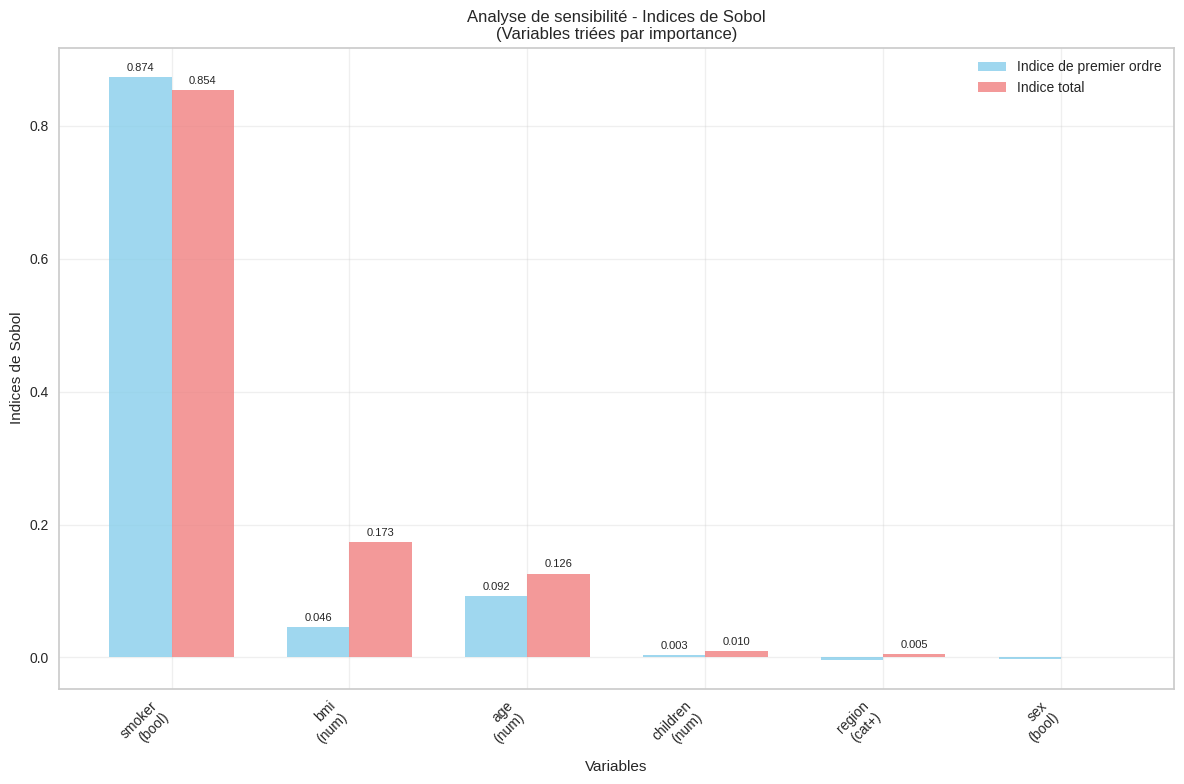

(<__main__.SobolAnalysisForRandomForest at 0x79bed5944610>,
 [{'variable': 'smoker',
   'type': 'binary_bool',
   'first_order_index': 0.8736082319578407,
   'total_order_index': 0.8539945212823007,
   'interaction_effect': -0.019613710675539964},
  {'variable': 'bmi',
   'type': 'numeric',
   'first_order_index': 0.04562522287331054,
   'total_order_index': 0.17344601365717224,
   'interaction_effect': 0.12782079078386172},
  {'variable': 'age',
   'type': 'numeric',
   'first_order_index': 0.09228793155593386,
   'total_order_index': 0.1263169102726877,
   'interaction_effect': 0.03402897871675385},
  {'variable': 'children',
   'type': 'numeric',
   'first_order_index': 0.0029636513660827014,
   'total_order_index': 0.010077005150647498,
   'interaction_effect': 0.007113353784564796},
  {'variable': 'region',
   'type': 'categorical',
   'first_order_index': -0.00318979129551535,
   'total_order_index': 0.005184517202533658,
   'interaction_effect': 0.008374308498049009},
  {'variab

In [51]:
sobol_analyzer = SobolAnalysisForRandomForest(X_train, grid_model.best_estimator_)
sobol_analyzer.run_complete_analysis(sobol_size=1000)

#**Sauvegarder le mod√®le**

In [47]:
import joblib
modele=best_model
joblib.dump(modele,'modele.pkl')

['modele.pkl']

# ***Campagne***

In [48]:
campaign=[[24,False,23,2,True,'Nord']]
x_cols=X.columns
campagne=pd.DataFrame(campaign,columns=x_cols)
campagne.to_csv('campagne.csv',index=False)
campagne

age    sex  bmi  children  smoker region
0   24  False   23         2    True   Nord

In [49]:
loaded_model = joblib.load('modele.pkl')
float(loaded_model.predict(campagne)[0])

16720.50953546827